In [2]:
## import statements
# These lines load the tests. 
from gofer.ok import check
import numpy as np
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Fix for datascience plots

### Normal Distribution

$$
\phi(z) = {\frac{1}{\sqrt{2 \pi}}} e^{-\frac{1}{2}z^2}, ~~ -\infty < z < \infty
$$

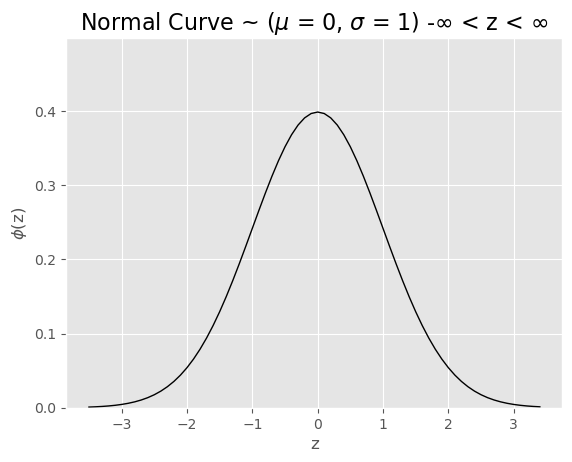

In [3]:
# The standard normal curve (standardized data)
# Plots a normal curve with specified parameters and area below curve shaded between lbound and rbound.
# datascience.util.plot_cdf_area(rbound=None, lbound=None, mean=0, sd=1)Â¶

plot_normal_cdf()

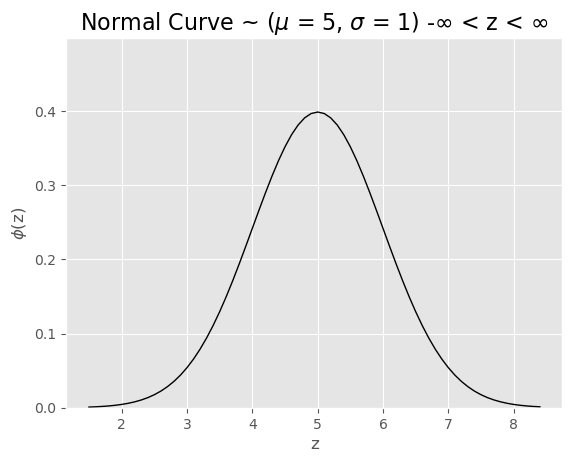

In [4]:
plot_normal_cdf(mean=5)

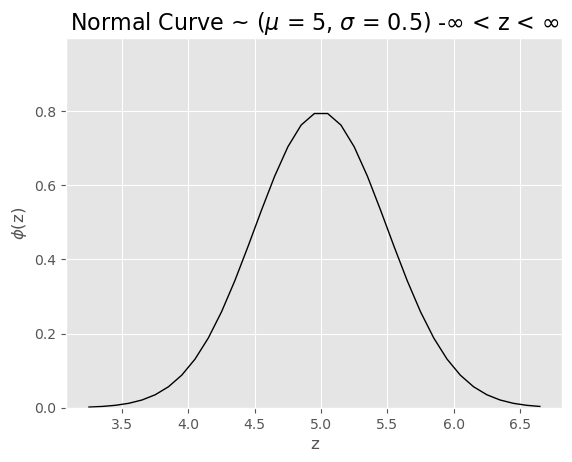

In [5]:
plot_normal_cdf(mean=5, sd=0.5)

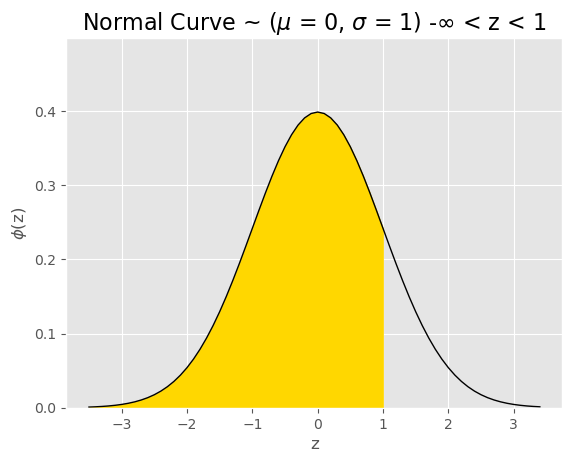

In [6]:
plot_normal_cdf(rbound=1)

In [7]:
from scipy import stats

In [8]:
stats.norm.cdf(1)

0.84134474606854293

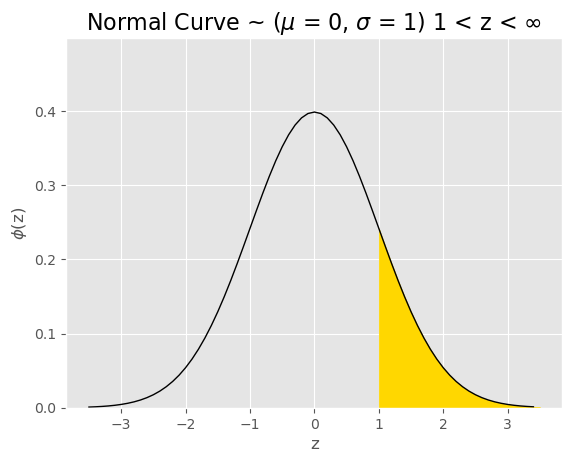

In [9]:
plot_normal_cdf(lbound=1)

In [10]:
# The total area under the curve is 1
1 - stats.norm.cdf(1)

0.15865525393145707

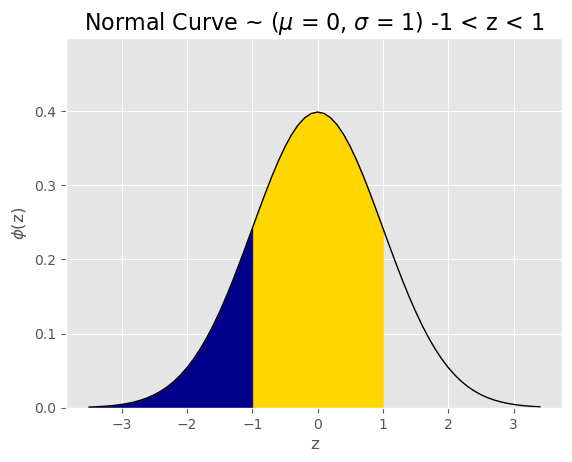

In [11]:
# Area under the standard normal curve, between -1 and 1

plot_normal_cdf(rbound=1, lbound=-1)

In [12]:
# Roughly 68% of the area lies within plus or minus one standard deviation
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.68268949213708585

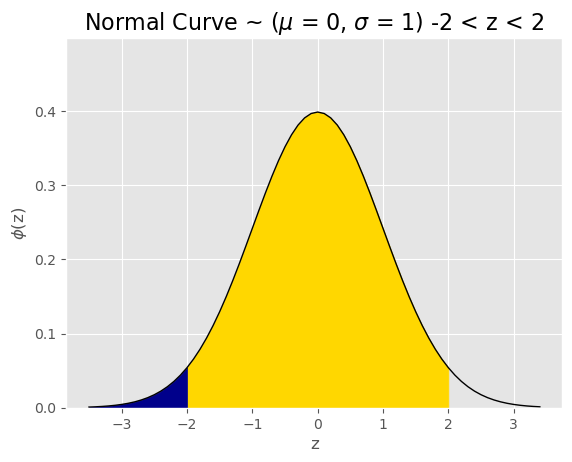

In [13]:
# Area under the standard normal curve, between -2 and 2

plot_normal_cdf(2, lbound=-2)

In [14]:
# Roughly 95% of the area lies within plus or minus two standard deviations
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.95449973610364158

### Correlation

In [15]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x    | y
1    | 2
2    | 3
3    | 1
4    | 5
5    | 2
6    | 7

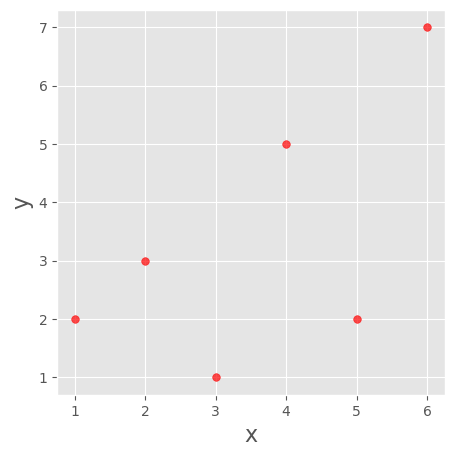

In [16]:
t.scatter(0, 1, s=30, color='red')

In [18]:
def standard_units(numbers_array):
    "Convert any array of numbers to standard units."
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array)   

In [19]:
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t_su

x    | y    | x (standard units) | y (standard units)
1    | 2    | -1.46385           | -0.648886
2    | 3    | -0.87831           | -0.162221
3    | 1    | -0.29277           | -1.13555
4    | 5    | 0.29277            | 0.811107
5    | 2    | 0.87831            | -0.648886
6    | 7    | 1.46385            | 1.78444

In [20]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x    | y    | x (standard units) | y (standard units) | product of standard units
1    | 2    | -1.46385           | -0.648886          | 0.949871
2    | 3    | -0.87831           | -0.162221          | 0.142481
3    | 1    | -0.29277           | -1.13555           | 0.332455
4    | 5    | 0.29277            | 0.811107           | 0.237468
5    | 2    | 0.87831            | -0.648886          | -0.569923
6    | 7    | 1.46385            | 1.78444            | 2.61215

In [21]:
# r is the average of the products of standard units

r = np.mean(t_product.column(4))
r

0.61741639718977093

#### What if the points lie exactly on a line?

In [22]:
x = np.arange(1, 7, 1)
y = x * 2 + 1
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x    | y
1    | 3
2    | 5
3    | 7
4    | 9
5    | 11
6    | 13

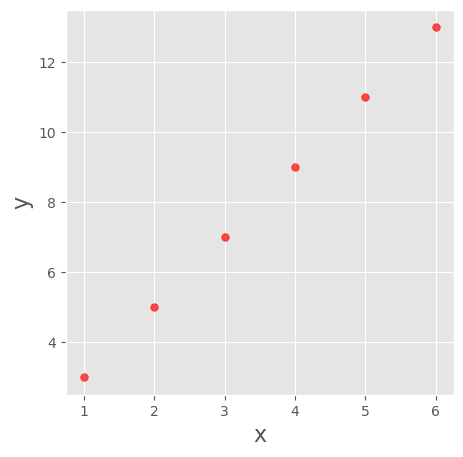

In [23]:
t.scatter(0, 1, s=30, color='red')

In [24]:
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t_su

x    | y    | x (standard units) | y (standard units)
1    | 3    | -1.46385           | -1.46385
2    | 5    | -0.87831           | -0.87831
3    | 7    | -0.29277           | -0.29277
4    | 9    | 0.29277            | 0.29277
5    | 11   | 0.87831            | 0.87831
6    | 13   | 1.46385            | 1.46385

In [25]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x    | y    | x (standard units) | y (standard units) | product of standard units
1    | 3    | -1.46385           | -1.46385           | 2.14286
2    | 5    | -0.87831           | -0.87831           | 0.771429
3    | 7    | -0.29277           | -0.29277           | 0.0857143
4    | 9    | 0.29277            | 0.29277            | 0.0857143
5    | 11   | 0.87831            | 0.87831            | 0.771429
6    | 13   | 1.46385            | 1.46385            | 2.14286

In [26]:
# r is the average of the products of standard units

r = np.mean(t_product.column(4))
r

1.0

## Old Faithful - Lab 8

In [3]:
faithful = Table.read_table("../../Lab08/faithful-new.csv")

In [4]:
faithful.stats() 

statistic | duration | wait
min       | 1.6      | 43
max       | 5.1      | 96
median    | 4        | 76
sum       | 948.677  | 19284

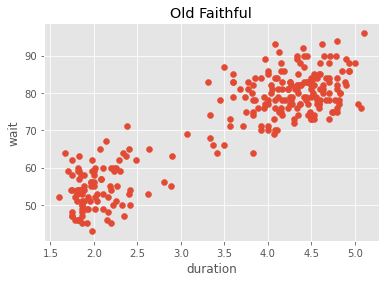

In [9]:
# Now plot
plt.style.use('ggplot')
plt.scatter(faithful.column('duration'),faithful.column('wait'))
#faithful.scatter('duration','wait') #
plt.title("Old Faithful")
plt.xlabel("duration")
plt.ylabel("wait")
plt.savefig("scatter.png") # Helpful way to save figure
plt.show()

***
Standard Units
***
$\bar{x}$=mean$(x)$<br>
<br>variance=mean$((x-\bar{x})^2)$<br>
<br>SD = $\sqrt{<(x-\bar{x})^2>}$<br>
<br>Z = ${\frac{(x-\bar{x})}{SD}}$

In [10]:
duration_mean =  np.mean(faithful.column("duration"))
duration_std = np.std(faithful.column("duration"))
wait_mean =  np.mean(faithful.column("wait"))
wait_std = np.std(faithful.column("wait"))

faithful_standard = Table().with_columns(
    "duration (standard units)", (faithful.column("duration") - duration_mean) / duration_std,
    "wait (standard units)", (faithful.column("wait") - wait_mean) / wait_std)
faithful_standard

duration (standard units) | wait (standard units)
0.0984989                 | 0.597123
-1.48146                  | -1.24518
-0.135861                 | 0.228663
-1.0575                   | -0.655644
0.917443                  | 1.03928
-0.530851                 | -1.17149
1.06403                   | 1.26035
0.0984989                 | 1.03928
-1.3498                   | -1.46626
0.756814                  | 1.03928
... (262 rows omitted)

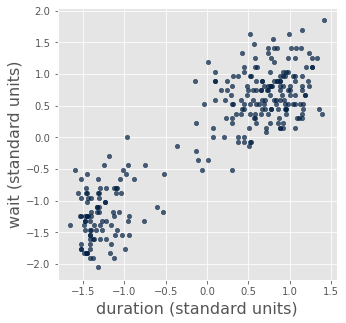

In [13]:
faithful_standard.scatter("duration (standard units)", "wait (standard units)")

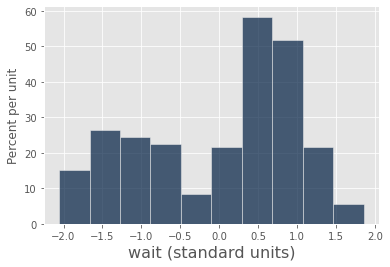

In [14]:
faithful_standard.hist("wait (standard units)")

***
Regression line
***
$$y = m x + b $$
$$ slope = m $$
$$ intercept = b $$
Standard units
$$y = m x$$